<a href="https://colab.research.google.com/github/subhradeepbhaumick/CODSOFT/blob/main/codsoft_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df = pd.read_csv("/content/fraudTrain.csv")
test_df = pd.read_csv("/content/fraudTest.csv")

In [5]:
print(train_df.shape)
print(test_df.shape)

(15593, 23)
(11697, 23)


In [6]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15593 non-null  int64  
 1   trans_date_trans_time  15593 non-null  object 
 2   cc_num                 15593 non-null  int64  
 3   merchant               15593 non-null  object 
 4   category               15593 non-null  object 
 5   amt                    15593 non-null  float64
 6   first                  15593 non-null  object 
 7   last                   15593 non-null  object 
 8   gender                 15593 non-null  object 
 9   street                 15593 non-null  object 
 10  city                   15593 non-null  object 
 11  state                  15593 non-null  object 
 12  zip                    15593 non-null  int64  
 13  lat                    15593 non-null  float64
 14  long                   15593 non-null  float64
 15  ci

In [7]:
train_df.dropna(axis=0,inplace=True) #if we have null values in train_df, so we're dropping those particular rows
test_df.dropna(axis=0,inplace=True)#if we have null values in test_df, so we're dropping those particular rows
print("Checking Duplicate values:",train_df.duplicated().sum(), test_df.duplicated().sum())
print("Checking Null values:", train_df.isna().sum().sum(), test_df.isna().sum().sum())

Checking Duplicate values: 0 0
Checking Null values: 0 0


In [8]:
le = LabelEncoder()
# data preprocessing for Training Data
train_data = train_df[['gender', "category", "amt", "city", "job", "is_fraud"]]
train_data.loc[:, 'category'] = le.fit_transform(train_data["category"])
train_data.loc[:, 'city'] = le.fit_transform(train_data["city"])
train_data.loc[:, 'job'] = le.fit_transform(train_data["job"])
train_data.loc[:, 'gender'] = train_data["gender"].map({'M': 0, 'F': 1})

# data preprocessing for Testing Data
test_data = test_df[['gender',"category","amt","city", "job","is_fraud"]]

test_data.loc[:, 'category'] = le.fit_transform(test_data["category"])
test_data.loc[:, 'city'] = le.fit_transform(test_data["city"])
test_data.loc[:, 'job'] = le.fit_transform(test_data["job"])
test_data.loc[:, 'gender'] = test_data["gender"].map({'M': 0, 'F': 1})


In [9]:
train_data.head(), test_data.head()

(  gender category     amt city  job  is_fraud
 0      1        8    4.97  493  356       0.0
 1      1        4  107.23  567  411       0.0
 2      0        0  220.11  439  294       0.0
 3      0        2   45.00   81  315       0.0
 4      0        9   41.96  203  110       0.0,
   gender category    amt city  job  is_fraud
 0      0       10   2.86  157  274       0.0
 1      1       10  29.84   16  390       0.0
 2      1        5  41.28   61  258       0.0
 3      0        9  60.05  751  405       0.0
 4      0       13   3.19  246  195       0.0)

In [10]:
X_train = train_data[['gender', "category", "amt", "city", "job"]]
Y_train = train_data["is_fraud"]

X_test = test_data[['gender', "category", "amt", "city", "job"]]
Y_test = test_data["is_fraud"]

**Logistic Regression**-Logistic regression (L1 Regularization) is a statistical method for predicting binary classes. The outcome or target variable is binary, meaning it can take on two possible outcomes (0 or 1, true or false, etc.). It models the probability of the default class (usually 1) and uses a logistic function to produce outputs between 0 and 1

In [11]:
lr_model = LogisticRegression(penalty="l1", solver="liblinear")
lr_model.fit(X_train, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [12]:
Y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Testing Accuracy Score:", accuracy)

Testing Accuracy Score: 0.9959815321477428


## **Random Forest**

In [14]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,Y_train)
y_pred=RFC.predict(X_test)

In [17]:
print('Accuracy:',accuracy_score(Y_test, y_pred))
print('Precision:',precision_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred))
print('F1 score:',f1_score(Y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(Y_test, y_pred))

Accuracy: 0.9978625170998632
Precision: 0.75
Recall: 0.20689655172413793
F1 score: 0.32432432432432434
Confusion matrix:
 [[11665     2]
 [   23     6]]


Text(0.5, 1.0, 'Confusion Matrix')

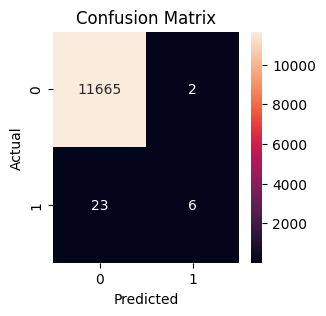

In [21]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')